In [1]:
# pip install missingno

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statistics as stat

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification

import joblib
import xgboost as xgb
from xgboost import XGBClassifier

from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import ADASYN

In [3]:
pd.options.display.max_rows = 4000

### Importing the data

In [4]:
data = pd.read_csv('Train1.csv', encoding='ISO-8859-1')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Overview

In [5]:
pd.set_option("display.max_columns", 150)
data.head()

,ID,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,RXASP,RXHEP,DASP14,DASPLT,DLH14,DMH14,DHH14,ONDRUG,DSCH,DIVH,DAP,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,DMAJNCH,DMAJNCHD,DMAJNCHX,DSIDE,DSIDED,DSIDEX,DDIAGISC,DDIAGHA,DDIAGUN,DNOSTRK,DNOSTRKX,DRSISC,DRSISCD,DRSH,DRSHD,DRSUNK,DRSUNKD,DPE,DPED,DALIVE,DALIVED,DPLACE,DDEAD,DDEADD,DDEADC,DDEADX,FDEAD,FLASTD,FDEADD,FDEADC,FDEADX,FRECOVER,FDENNIS,FPLACE,FAP,FOAC,FU1_RECD,FU2_DONE,COUNTRY,CNTRYNUM,FU1_COMP,NCCODE,CMPLASP,CMPLHEP,DIED,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,OCCODE,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,1,17,D,M,69,Y,NaN,Y,Y,NaN,NaN,140,N,N,N,Y,N,Y,N,Y,PACS,sty-91,99,99,4,Y,N,Y,Y,N,NaN,N,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,E,NaN,NaN,14.0,187.0,UK,27,NaN,13,Y,Y,0,187.0,0.6980,0.2344,0.1054,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,10,F,M,76,Y,NaN,Y,N,NaN,NaN,150,Y,Y,Y,N,N,N,N,N,LACS,sty-91,99,99,7,N,L,N,Y,Y,NaN,N,14,NaN,NaN,N,N,N,N,Y,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,NaN,NaN,16.0,192.0,UK,27,NaN,NaN,Y,Y,0,192.0,0.5389,0.1555,0.0421,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,24,F,M,23,N,NaN,Y,N,NaN,NaN,120,N,N,N,N,N,N,N,Y,OTH,lut-91,99,99,2,N,L,N,N,Y,NaN,N,11,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,11.0,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,N,A,NaN,NaN,37.0,193.0,UK,27,NaN,NaN,Y,Y,0,193.0,0.1500,0.0038,0.0054,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,5,D,F,83,N,NaN,N,N,NaN,NaN,130,Y,Y,Y,Y,Y,N,N,N,TACS,Mar-91,99,99,6,N,H,N,N,N,NaN,N,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,Y,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,N,D,NaN,NaN,24.0,242.0,UK,27,NaN,4,Y,N,0,242.0,0.9489,0.5412,0.2304,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,1,8,D,F,64,Y,NaN,Y,Y,NaN,NaN,180,Y,Y,Y,N,Y,Y,N,N,TACS,Mar-91,99,99,2,Y,H,Y,Y,N,NaN,Y,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,NaN,NaN,21.0,198.0,UK,27,NaN,NaN,Y,Y,0,198.0,0.8480,0.2780,0.1559,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data.set_index('ID')

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,RXASP,RXHEP,DASP14,DASPLT,DLH14,DMH14,DHH14,ONDRUG,DSCH,DIVH,DAP,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,DMAJNCH,DMAJNCHD,DMAJNCHX,DSIDE,DSIDED,DSIDEX,DDIAGISC,DDIAGHA,DDIAGUN,DNOSTRK,DNOSTRKX,DRSISC,DRSISCD,DRSH,DRSHD,DRSUNK,DRSUNKD,DPE,DPED,DALIVE,DALIVED,DPLACE,DDEAD,DDEADD,DDEADC,DDEADX,FDEAD,FLASTD,FDEADD,FDEADC,FDEADX,FRECOVER,FDENNIS,FPLACE,FAP,FOAC,FU1_RECD,FU2_DONE,COUNTRY,CNTRYNUM,FU1_COMP,NCCODE,CMPLASP,CMPLHEP,DIED,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,OCCODE,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,17,D,M,69,Y,NaN,Y,Y,NaN,NaN,140,N,N,N,Y,N,Y,N,Y,PACS,sty-91,99,99,4,Y,N,Y,Y,N,NaN,N,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,E,NaN,NaN,14.0,187.0,UK,27,NaN,13,Y,Y,0,187.0,0.6980,0.2344,0.1054,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,10,F,M,76,Y,NaN,Y,N,NaN,NaN,150,Y,Y,Y,N,N,N,N,N,LACS,sty-91,99,99,7,N,L,N,Y,Y,NaN,N,14,NaN,NaN,N,N,N,N,Y,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,NaN,NaN,16.0,192.0,UK,27,NaN,NaN,Y,Y,0,192.0,0.5389,0.1555,0.0421,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,24,F,M,23,N,NaN,Y,N,NaN,NaN,120,N,N,N,N,N,N,N,Y,OTH,lut-91,99,99,2,N,L,N,N,Y,NaN,N,11,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,11.0,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,N,A,NaN,NaN,37.0,193.0,UK,27,NaN,NaN,Y,Y,0,193.0,0.1500,0.0038,0.0054,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,D,F,83,N,NaN,N,N,NaN,NaN,130,Y,Y,Y,Y,Y,N,N,N,TACS,Mar-91,99,99,6,N,H,N,N,N,NaN,N,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,Y,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,N,D,NaN,NaN,24.0,242.0,UK,27,NaN,4,Y,N,0,242.0,0.9489,0.5412,0.2304,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,8,D,F,64,Y,NaN,Y,Y,NaN,NaN,180,Y,Y,Y,N,Y,Y,N,N,TACS,Mar-91,99,99,2,Y,H,Y,Y,N,NaN,Y,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,NaN,NaN,21.0,198.0,UK,27,NaN,NaN,Y,Y,0,198.0,0.8480,0.2780,0.1559,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,38,4,F,F,81,N,N,N,N,N,N,180,Y,N,N,N,N,N,Y,Y,POCS,lip-93,21,7,6,N,M,N,Y,N,Y,NaN,3,N,N,N,N,N,N,Y,N,N,N,N,NaN,NaN,N,NaN,NaN,N,N,Y,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,Y,3.0,D,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Y,N,C,Y,N,46.0,192.0,ITAL,14,18.0,NaN,Y,Y,0,192.0,0.6662,0.1579,0.0388,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9822,86,11,F,F,49,N,N,Y,N,N,N,150,Y,Y,Y,Y,N,N,N,N,PACS,maj-93,23,2,5,Y,M,Y,N,N,Y,NaN,14,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,Y,N,25.0,170.0,UK,27,15.0,NaN,Y,Y,0,170.0,0.4291,0.0369,0.0244,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9823,98,24,F,M,63,Y,N,Y,Y,N,N,150,Y,Y,Y,N,Y,C,N,C,TACS,lip-94,17,53,5,N,N,N,Y,N,N,NaN,14,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,Y,15.0,D,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,N,N,A,Y,N,26.0,160.0,NETH,15,15.0,NaN,Y,Y,0,160.0,0.6681,0.1673,0.0759,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# drop the fields that are not in the test dataset
data.drop(columns= ['DDEAD','DDEADD','DDEADC','DDEADX','FDEAD','FDEADD','FDEADC','FDEADX','OCCODE'], inplace=True)

In [8]:
data.isnull().sum()

ID              0
HOSPNUM         0
RDELAY          0
RCONSC          0
SEX             0
AGE             0
RSLEEP          0
RATRIAL       484
RCT             0
RVISINF         0
RHEP24        175
RASP3         484
RSBP            0
RDEF1           0
RDEF2           0
RDEF3           0
RDEF4           0
RDEF5           0
RDEF6           0
RDEF7           0
RDEF8           0
STYPE           0
RDATE           0
HOURLOCAL       0
MINLOCAL        0
DAYLOCAL        0
RXASP           0
RXHEP           0
DASP14         12
DASPLT         81
DLH14          14
DMH14         498
DHH14        9278
ONDRUG          0
DSCH          152
DIVH          152
DAP            11
DOAC           11
DGORM          15
DSTER          16
DCAA           17
DHAEMD         16
DCAREND       498
DTHROMB       158
DMAJNCH         8
DMAJNCHD     9686
DMAJNCHX     9689
DSIDE           8
DSIDED       9442
DSIDEX       9438
DDIAGISC       12
DDIAGHA        12
DDIAGUN        10
DNOSTRK        12
DNOSTRKX     9560
DRSISC    

In [9]:
# List the numeric columns
num = [col for col in data.columns if data[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'DIED', 'TD', 'EXPDD', 'EXPD6', 'EXPD14', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [10]:
# List the categorical columns
obj = [col for col in data.columns if data[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP']


In [11]:
# List the unique values in each numeric column 
pd.Series({col: data[col].unique() for col in data[num].columns})

ID           [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
HOSPNUM      [1, 6, 4, 8, 3, 10, 2, 5, 15, 16, 11, 13, 17, ...
RDELAY       [17, 10, 24, 5, 8, 21, 4, 13, 2, 45, 18, 19, 3...
AGE          [69, 76, 23, 83, 64, 66, 74, 87, 43, 57, 71, 7...
RSBP         [140, 150, 120, 130, 180, 110, 190, 160, 170, ...
HOURLOCAL    [99, 12, 11, 14, 22, 13, 15, 9, 10, 17, 19, 8,...
MINLOCAL     [99, 25, 19, 4, 11, 26, 51, 54, 52, 38, 36, 1,...
DAYLOCAL                                 [4, 7, 2, 6, 3, 1, 5]
ONDRUG       [14, 11, 10, 4, 7, 1, 8, 5, 3, 6, 9, 12, 13, 0...
DMAJNCHD     [nan, 10.0, 14.0, 1.0, 7.0, 5.0, 4.0, 8.0, 6.0...
DSIDED       [nan, 1.0, 8.0, 12.0, 11.0, 14.0, 2.0, 4.0, 7....
DRSISCD      [nan, 2.0, 3.0, 53.0, 1.0, 7.0, 5.0, 10.0, 6.0...
DRSHD        [nan, 3.0, 2.0, 12.0, 9.0, 0.0, 1.0, 6.0, 14.0...
DRSUNKD      [nan, 4.0, 14.0, 23.0, 0.0, 2.0, 15.0, 3.0, 13...
DPED         [nan, 11.0, 23.0, 1.0, 4.0, 6.0, 12.0, 16.0, 8...
DALIVED      [nan, 11.0, 4.0, 7.0, 20.0, 10.0, 44.0, 5.

In [12]:
# these fields should be categorical 
for col in ['SET14D','ID14','DEAD1','DEAD2','DEAD3','DEAD4','DEAD5','DEAD6','DEAD7','DEAD8',
'H14','ISC14','NK14','STRK14','HTI14','PE14','DVT14','TRAN14','NCB14']: 
    data[col] = data[col].astype('object')

In [13]:
# List the numeric columns
num = [col for col in data.columns if data[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'DIED', 'TD', 'EXPDD', 'EXPD6', 'EXPD14']


In [14]:
# List the categorical columns
obj = [col for col in data.columns if data[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [15]:
# List the unique values in each categorical column
pd.Series({col: data[col].unique() for col in data[obj].columns})

RCONSC                                              [D, F, U]
SEX                                                    [M, F]
RSLEEP                                                 [Y, N]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [Y, N]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [N, Y, C]
RDEF2                                               [N, Y, C]
RDEF3                                               [N, Y, C]
RDEF4                                               [Y, N, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [Y, N, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [Y, N, C]
STYPE   

In [16]:
data.describe(include="object").T

,count,unique,top,freq
RCONSC,9762,3,F,7518
SEX,9762,2,M,5261
RSLEEP,9762,2,N,6909
RATRIAL,9278,2,N,7718
RCT,9762,2,Y,6492
RVISINF,9762,2,N,6590
RHEP24,9587,2,N,9367
RASP3,9278,2,N,7312
RDEF1,9762,3,Y,7060
RDEF2,9762,3,Y,8314


In [17]:
# encode these fields 
data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']] = data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].where(data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].isnull(), 1).fillna(0).astype(object)

In [18]:
# List the unique values in each numeric column 
pd.Series({col: data[col].unique() for col in data[num].columns})

ID           [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
HOSPNUM      [1, 6, 4, 8, 3, 10, 2, 5, 15, 16, 11, 13, 17, ...
RDELAY       [17, 10, 24, 5, 8, 21, 4, 13, 2, 45, 18, 19, 3...
AGE          [69, 76, 23, 83, 64, 66, 74, 87, 43, 57, 71, 7...
RSBP         [140, 150, 120, 130, 180, 110, 190, 160, 170, ...
HOURLOCAL    [99, 12, 11, 14, 22, 13, 15, 9, 10, 17, 19, 8,...
MINLOCAL     [99, 25, 19, 4, 11, 26, 51, 54, 52, 38, 36, 1,...
DAYLOCAL                                 [4, 7, 2, 6, 3, 1, 5]
ONDRUG       [14, 11, 10, 4, 7, 1, 8, 5, 3, 6, 9, 12, 13, 0...
DMAJNCHD     [nan, 10.0, 14.0, 1.0, 7.0, 5.0, 4.0, 8.0, 6.0...
DSIDED       [nan, 1.0, 8.0, 12.0, 11.0, 14.0, 2.0, 4.0, 7....
DRSISCD      [nan, 2.0, 3.0, 53.0, 1.0, 7.0, 5.0, 10.0, 6.0...
DRSHD        [nan, 3.0, 2.0, 12.0, 9.0, 0.0, 1.0, 6.0, 14.0...
DRSUNKD      [nan, 4.0, 14.0, 23.0, 0.0, 2.0, 15.0, 3.0, 13...
DPED         [nan, 11.0, 23.0, 1.0, 4.0, 6.0, 12.0, 16.0, 8...
DALIVED      [nan, 11.0, 4.0, 7.0, 20.0, 10.0, 44.0, 5.

In [19]:
# List the unique values in each categorical column
pd.Series({col: data[col].unique() for col in data[obj].columns})

RCONSC                                              [D, F, U]
SEX                                                    [M, F]
RSLEEP                                                 [Y, N]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [Y, N]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [N, Y, C]
RDEF2                                               [N, Y, C]
RDEF3                                               [N, Y, C]
RDEF4                                               [Y, N, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [Y, N, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [Y, N, C]
STYPE   

In [20]:
null_perc = data.isna().sum()/data.shape[0]
null_perc

ID           0.000000
HOSPNUM      0.000000
RDELAY       0.000000
RCONSC       0.000000
SEX          0.000000
AGE          0.000000
RSLEEP       0.000000
RATRIAL      0.049580
RCT          0.000000
RVISINF      0.000000
RHEP24       0.017927
RASP3        0.049580
RSBP         0.000000
RDEF1        0.000000
RDEF2        0.000000
RDEF3        0.000000
RDEF4        0.000000
RDEF5        0.000000
RDEF6        0.000000
RDEF7        0.000000
RDEF8        0.000000
STYPE        0.000000
RDATE        0.000000
HOURLOCAL    0.000000
MINLOCAL     0.000000
DAYLOCAL     0.000000
RXASP        0.000000
RXHEP        0.000000
DASP14       0.001229
DASPLT       0.008297
DLH14        0.001434
DMH14        0.051014
DHH14        0.950420
ONDRUG       0.000000
DSCH         0.015571
DIVH         0.015571
DAP          0.001127
DOAC         0.001127
DGORM        0.001537
DSTER        0.001639
DCAA         0.001741
DHAEMD       0.001639
DCAREND      0.051014
DTHROMB      0.016185
DMAJNCH      0.000820
DMAJNCHD  

In [21]:
# before imputation, identify / drop columns with > 20% null 
null_perc[null_perc > 0.2].index

# we may separately determine if these fields are influential in predicting death 

Index(['DHH14', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED',
       'DALIVED', 'DPLACE', 'FLASTD', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP',
       'FOAC', 'NCCODE'],
      dtype='object')

In [22]:
data.shape

(9762, 104)

In [23]:
drop_cols = list(null_perc[null_perc > 0.2].index)
data = data.drop(drop_cols, axis = 1)

In [24]:
data.shape

(9762, 88)

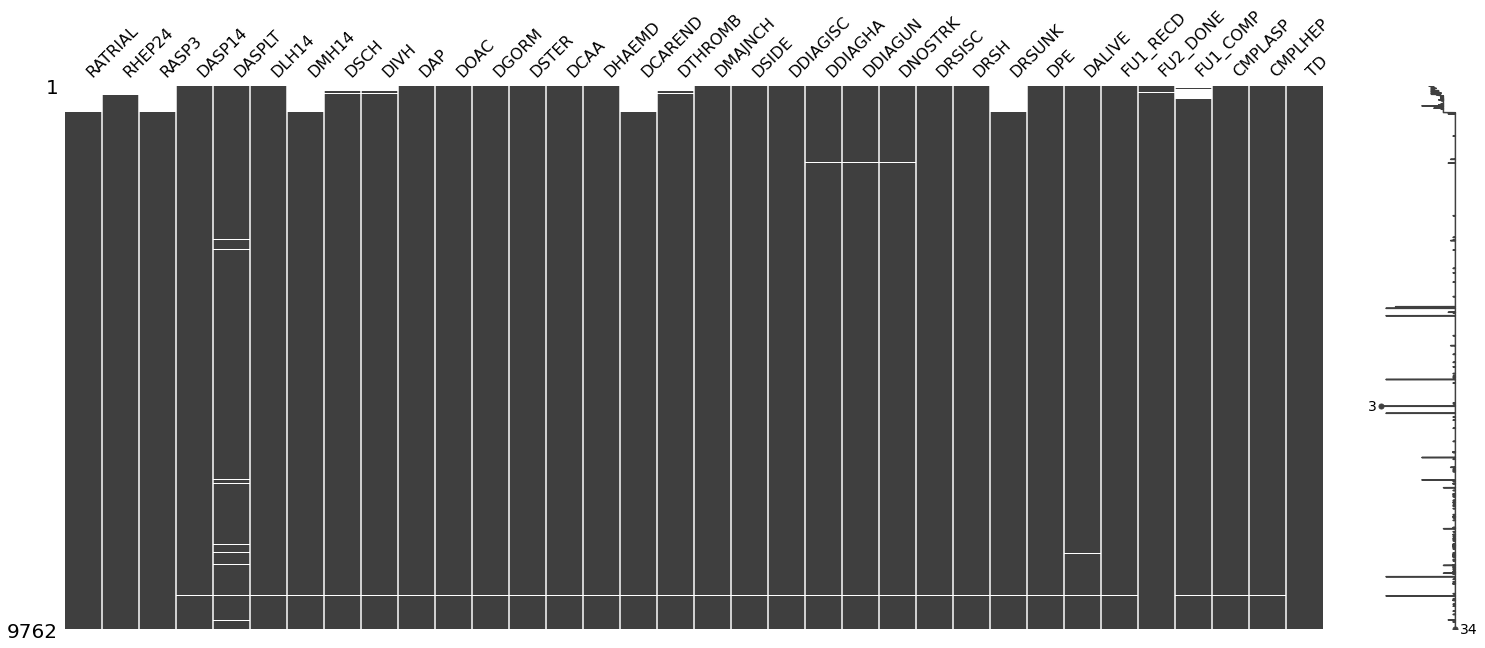

In [25]:
# see if values are Missing completely at random
missingdata_data = data.columns[data.isnull().any()].tolist()
msno.matrix(data[missingdata_data])

This matrix shows how nulls are scattered across the dataset. White segments or lines represent where missing values lie.

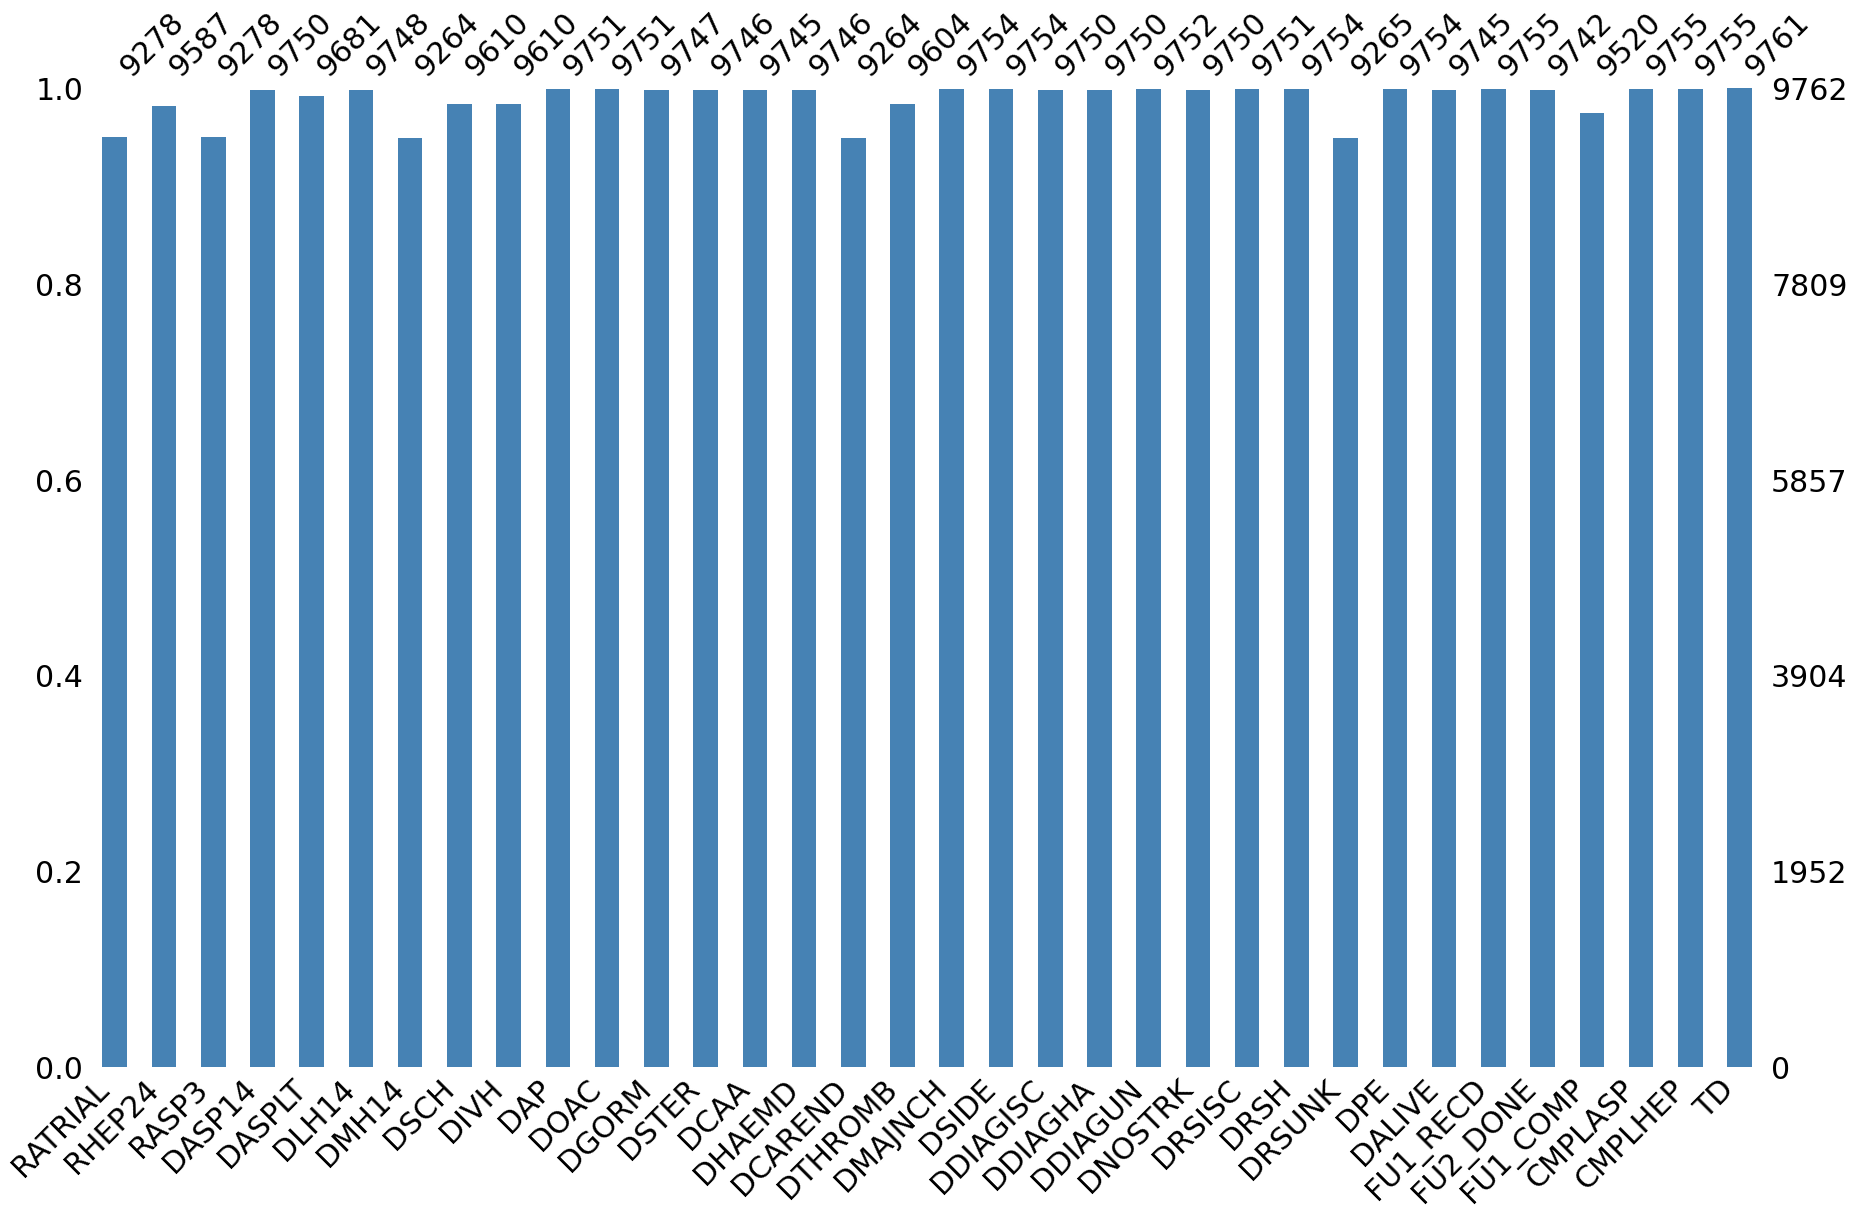

In [26]:
msno.bar(data[missingdata_data], color="steelblue", figsize=(30,18), fontsize=30)

In [27]:
# remove rows with 15 or more missing columns 
for idx in range(data.shape[0]):
    data.loc[idx, 'missing_cnt'] = data.iloc[idx, :].isnull().sum()

In [28]:
threshold = 15
data.drop(data[data['missing_cnt'] >= threshold].index, axis = 0, inplace = True)

data.shape

(9751, 89)

In [29]:
data.drop(columns= ['missing_cnt'], inplace=True)

In [30]:
num = [col for col in data.columns if data[col].dtype != 'object']
obj = [col for col in data.columns if data[col].dtype == 'object']

In [31]:
# Use fillna to impute null values with median in numeric columns 
data.fillna(data[num].median(), inplace = True)

In [32]:
# Use fillna to impute null values with mode in categorical columns 
l = data[obj].mode()
data[obj] = data[obj].fillna(value=l.iloc[0])

In [33]:
data.isna().sum()

ID           0
HOSPNUM      0
RDELAY       0
RCONSC       0
SEX          0
AGE          0
RSLEEP       0
RATRIAL      0
RCT          0
RVISINF      0
RHEP24       0
RASP3        0
RSBP         0
RDEF1        0
RDEF2        0
RDEF3        0
RDEF4        0
RDEF5        0
RDEF6        0
RDEF7        0
RDEF8        0
STYPE        0
RDATE        0
HOURLOCAL    0
MINLOCAL     0
DAYLOCAL     0
RXASP        0
RXHEP        0
DASP14       0
DASPLT       0
DLH14        0
DMH14        0
ONDRUG       0
DSCH         0
DIVH         0
DAP          0
DOAC         0
DGORM        0
DSTER        0
DCAA         0
DHAEMD       0
DCAREND      0
DTHROMB      0
DMAJNCH      0
DMAJNCHX     0
DSIDE        0
DSIDEX       0
DDIAGISC     0
DDIAGHA      0
DDIAGUN      0
DNOSTRK      0
DNOSTRKX     0
DRSISC       0
DRSH         0
DRSUNK       0
DPE          0
DALIVE       0
FU1_RECD     0
FU2_DONE     0
COUNTRY      0
CNTRYNUM     0
FU1_COMP     0
CMPLASP      0
CMPLHEP      0
DIED         0
TD           0
EXPDD     

In [34]:
# All features 
data_num = list(data.select_dtypes(include = np.number).columns)
data_obj = list(data.select_dtypes(include = np.object).columns) 

In [35]:
data_num

['ID',
 'HOSPNUM',
 'RDELAY',
 'AGE',
 'RSBP',
 'RDATE',
 'HOURLOCAL',
 'MINLOCAL',
 'DAYLOCAL',
 'ONDRUG',
 'DMAJNCHX',
 'DSIDEX',
 'DNOSTRKX',
 'FU1_RECD',
 'FU2_DONE',
 'CNTRYNUM',
 'FU1_COMP',
 'DIED',
 'TD',
 'EXPDD',
 'EXPD6',
 'EXPD14',
 'SET14D',
 'ID14',
 'DEAD1',
 'DEAD2',
 'DEAD3',
 'DEAD4',
 'DEAD5',
 'DEAD6',
 'DEAD7',
 'DEAD8',
 'H14',
 'ISC14',
 'NK14',
 'STRK14',
 'HTI14',
 'PE14',
 'DVT14',
 'TRAN14',
 'NCB14']

In [36]:
data_obj

['RCONSC',
 'SEX',
 'RSLEEP',
 'RATRIAL',
 'RCT',
 'RVISINF',
 'RHEP24',
 'RASP3',
 'RDEF1',
 'RDEF2',
 'RDEF3',
 'RDEF4',
 'RDEF5',
 'RDEF6',
 'RDEF7',
 'RDEF8',
 'STYPE',
 'RXASP',
 'RXHEP',
 'DASP14',
 'DASPLT',
 'DLH14',
 'DMH14',
 'DSCH',
 'DIVH',
 'DAP',
 'DOAC',
 'DGORM',
 'DSTER',
 'DCAA',
 'DHAEMD',
 'DCAREND',
 'DTHROMB',
 'DMAJNCH',
 'DSIDE',
 'DDIAGISC',
 'DDIAGHA',
 'DDIAGUN',
 'DNOSTRK',
 'DRSISC',
 'DRSH',
 'DRSUNK',
 'DPE',
 'DALIVE',
 'COUNTRY',
 'CMPLASP',
 'CMPLHEP']

In [37]:
dum = pd.get_dummies(data[data_obj], drop_first=True)

In [38]:
data_mod = pd.concat([data[data_num], dum], axis = 1)

In [39]:
data_mod.shape

(9751, 164)

In [40]:
data_mod.head()

,ID,HOSPNUM,RDELAY,AGE,RSBP,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,ONDRUG,DMAJNCHX,DSIDEX,DNOSTRKX,FU1_RECD,FU2_DONE,CNTRYNUM,FU1_COMP,DIED,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14,RCONSC_F,RCONSC_U,SEX_M,RSLEEP_Y,RATRIAL_Y,RCT_Y,RVISINF_Y,RHEP24_Y,RASP3_Y,RDEF1_N,RDEF1_Y,RDEF2_N,RDEF2_Y,RDEF3_N,RDEF3_Y,RDEF4_N,RDEF4_Y,RDEF5_N,RDEF5_Y,RDEF6_N,RDEF6_Y,RDEF7_N,RDEF7_Y,RDEF8_N,RDEF8_Y,STYPE_OTH,STYPE_PACS,STYPE_POCS,STYPE_TACS,RXASP_Y,RXHEP_L,RXHEP_M,RXHEP_N,DASP14_U,...,DAP_Y,DOAC_U,DOAC_Y,DGORM_U,DGORM_Y,DSTER_U,DSTER_Y,DCAA_U,DCAA_Y,DHAEMD_U,DHAEMD_Y,DCAREND_U,DCAREND_Y,DTHROMB_U,DTHROMB_Y,DMAJNCH_U,DMAJNCH_Y,DSIDE_U,DSIDE_Y,DDIAGISC_U,DDIAGISC_Y,DDIAGISC_u,DDIAGHA_U,DDIAGHA_Y,DDIAGUN_U,DDIAGUN_Y,DNOSTRK_U,DNOSTRK_Y,DRSISC_U,DRSISC_Y,DRSH_U,DRSH_Y,DRSUNK_U,DRSUNK_Y,DPE_U,DPE_Y,DALIVE_U,DALIVE_Y,COUNTRY_AUSL,COUNTRY_AUST,COUNTRY_BELG,COUNTRY_BRAS,COUNTRY_CANA,COUNTRY_CHIL,COUNTRY_CZEC,COUNTRY_DENM,COUNTRY_EIRE,COUNTRY_FINL,COUNTRY_FRAN,COUNTRY_GREE,COUNTRY_HONG,COUNTRY_HUNG,COUNTRY_INDI,COUNTRY_ISRA,COUNTRY_ITAL,COUNTRY_JAPA,COUNTRY_NETH,COUNTRY_NEW,COUNTRY_NORW,COUNTRY_POLA,COUNTRY_PORT,COUNTRY_ROMA,COUNTRY_SING,COUNTRY_SLOK,COUNTRY_SLOV,COUNTRY_SOUT,COUNTRY_SPAI,COUNTRY_SRI,COUNTRY_SWED,COUNTRY_SWIT,COUNTRY_TURK,COUNTRY_UK,COUNTRY_USA,CMPLASP_Y,CMPLHEP_Y
0,1,1,17,69,140,1,99,99,4,14,0,0,0,14.0,187.0,27,16.0,0,187.0,0.6980,0.2344,0.1054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,2,1,10,76,150,1,99,99,7,14,0,0,0,16.0,192.0,27,16.0,0,192.0,0.5389,0.1555,0.0421,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,3,1,24,23,120,1,99,99,2,11,0,0,0,37.0,193.0,27,16.0,0,193.0,0.1500,0.0038,0.0054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,4,1,5,83,130,1,99,99,6,14,0,0,0,24.0,242.0,27,16.0,0,242.0,0.9489,0.5412,0.2304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,6,1,8,64,180,1,99,99,2,14,0,0,0,21.0,198.0,27,16.0,0,198.0,0.8480,0.2780,0.1559,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [41]:
x = data_mod.drop('DIED', axis = 1)
y = data_mod['DIED']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.3, random_state = 10)

In [43]:
print(f'{round(sum(y==1)/y.count()*100,3)} % is positive for target variable')

23.218 % is positive for target variable


In [44]:
# from sklearn.preprocessing import StandardScaler
# Scaler_x = StandardScaler()
# x_train = Scaler_x.fit_transform(x_train)
# x_test = Scaler_x.transform(x_test)

In [45]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 5240, 1: 1585})
After Counter({0: 5240, 1: 5223})


# Model Building

In [46]:
# Result Collection List
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()
accuracy = list()

In [47]:
# Function for appending data into corresponding list
def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [48]:
# 10-fold Cross validation object
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

## Logistic Regression

### Imputed Actual Data - Logistic Regression

In [49]:
# log_model=LogisticRegression(random_state=42)

# params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

# # Create grid search using 10-fold cross validation
# clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='accuracy', n_jobs=-1)
# clf_LR.fit(x_train, y_train)
# clf_LR.best_estimator_

In [50]:
# test_eval(clf_LR, x_test, y_test, 'Logistic Regression', 'Actual')

### ADASYN Imputed Data - Logistic Regression

In [51]:
# clf_LR.fit(x_train_ada, y_train_ada)
# clf_LR.best_estimator_

In [52]:
# test_eval(clf_LR, x_test, y_test, 'Logistic Regression', 'ADASYN')

## Decision Tree

In [53]:
# estimators = [2,10,30,50,100]
# # Maximum number of depth in each tree:
# max_depth = [i for i in range(5,16,2)]
# # Minimum number of samples to consider to split a node:
# min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# # Minimum number of samples to consider at each leaf node:
# min_samples_leaf = [1, 2, 5]

### Imputed Actual Data - Decision Tree

In [54]:
# tree_model = DecisionTreeClassifier(random_state=42)

# tree_param_grid = { 
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf
# }

# clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
# clf_DT.fit(x_train, y_train)
# clf_DT.best_estimator_

In [55]:
# test_eval(clf_DT, x_test, y_test, 'Decision Tree', 'Actual')

### ADASYN Imputed Data - Decision Tree

In [56]:
# clf_DT.fit(x_train_ada, y_train_ada)
# clf_DT.best_estimator_

In [57]:
# test_eval(clf_DT, x_test, y_test, 'Decision Tree', 'ADASYN')

## Random Forest

### Imputed Actual Data - Random Forest

In [58]:
# rf_model = RandomForestClassifier(random_state=42)

# rf_params={'n_estimators':estimators,
#            'max_depth':max_depth,
#            'min_samples_split':min_samples_split}

# clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='accuracy', n_jobs=-1, n_iter=20, verbose=2, random_state=42)
# clf_RF.fit(x_train, y_train)
# clf_RF.best_estimator_

In [59]:
# test_eval(clf_RF, x_test, y_test, 'Random Forest', 'Actual')

### ADASYN Imputed Data - Random Forest

In [60]:
# clf_RF.fit(x_train_ada, y_train_ada)
# clf_RF.best_estimator_

In [61]:
# test_eval(clf_RF, x_test, y_test, 'Random Forest', 'ADASYN')

## XGBoost

In [62]:
classifier_XGBodel = XGBClassifier(random_state=42)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

clf_XGB = RandomizedSearchCV(classifier_XGBodel, param_distributions=params, n_iter=20, scoring='accuracy', 
                                   n_jobs=-1, cv=cv, verbose=2, random_state=42)
clf_XGB.fit(x_train, y_train)
clf_XGB.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.5min finished
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
test_eval(clf_XGB, x_test, y_test, 'XGBoost', 'Actual')

Confusion Matrix
[[2245    2]
 [   8  671]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2247
           1       1.00      0.99      0.99       679

    accuracy                           1.00      2926
   macro avg       1.00      0.99      1.00      2926
weighted avg       1.00      1.00      1.00      2926
 

AUC-ROC
0.9986766842781046


### ADASYN Imputed Data - XGBoost

In [64]:
# clf_XGB.fit(x_train_ada, y_train_ada)
# clf_XGB.best_estimator_

In [65]:
# test_eval(clf_XGB, x_test, y_test, 'XGBoost', 'ADASYN')

### Champion Model

In [66]:
clf_XGB.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

In [67]:
classifier_XGB = XGBClassifier(subsample= 1.0,
 min_child_weight= 1,
 max_depth= 3,
 gamma= 0.5,
 colsample_bytree= 0.8)

In [68]:
# save the model to disk
filename = 'classifier_XGB2.sav'
pickle.dump(classifier_XGB, open(filename, 'wb'))

In [69]:
joblib.dump(classifier_XGB, "classifier_XGB2.joblib.dat")

['classifier_XGB2.joblib.dat']

### Applying model on unseen data 

In [70]:
data1 = pd.read_csv('Test1.csv', encoding='ISO-8859-1')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [71]:
data1.set_index('ID')

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,RXASP,RXHEP,DASP14,DASPLT,DLH14,DMH14,DHH14,ONDRUG,DSCH,DIVH,DAP,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,DMAJNCH,DMAJNCHD,DMAJNCHX,DSIDE,DSIDED,DSIDEX,DDIAGISC,DDIAGHA,DDIAGUN,DNOSTRK,DNOSTRKX,DRSISC,DRSISCD,DRSH,DRSHD,DRSUNK,DRSUNKD,DPE,DPED,DALIVE,DALIVED,DPLACE,FLASTD,FRECOVER,FDENNIS,FPLACE,FAP,FOAC,FU1_RECD,FU2_DONE,COUNTRY,CNTRYNUM,FU1_COMP,NCCODE,CMPLASP,CMPLHEP,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9826,1,43,F,F,71,N,NaN,Y,N,NaN,NaN,170,Y,Y,Y,N,N,N,N,N,LACS,sty-91,99,99,3,Y,N,Y,Y,N,NaN,N,11.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,11.0,NaN,NaN,N,Y,A,NaN,NaN,11.0,189.0,UK,27,NaN,NaN,Y,Y,189.0,0.5275,0.1009,0.0323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9827,1,6,F,M,81,N,NaN,N,N,NaN,NaN,170,N,N,N,Y,N,N,N,N,PACS,sty-91,99,99,7,N,H,N,Y,N,NaN,Y,14.0,NaN,NaN,N,N,N,N,Y,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,16.0,NaN,NaN,Y,N,A,NaN,NaN,23.0,183.0,UK,27,NaN,NaN,Y,Y,183.0,0.4021,0.1147,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9828,4,20,F,M,78,N,NaN,N,N,NaN,NaN,170,Y,Y,Y,N,N,N,N,N,LACS,lut-91,99,99,6,Y,H,Y,Y,N,NaN,Y,14.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,N,Y,E,NaN,NaN,17.0,214.0,UK,27,NaN,NaN,Y,Y,214.0,0.5600,0.1709,0.0441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9829,1,39,F,M,54,N,NaN,Y,N,NaN,NaN,135,Y,Y,Y,N,N,N,N,N,LACS,lut-91,99,99,2,N,N,N,Y,N,NaN,N,7.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,7.0,NaN,NaN,N,N,A,NaN,NaN,16.0,185.0,UK,27,NaN,NaN,Y,Y,185.0,0.3132,0.0471,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9830,1,4,F,F,77,N,NaN,N,N,NaN,NaN,140,Y,Y,Y,N,N,N,Y,N,POCS,lut-91,99,99,1,Y,N,Y,Y,N,NaN,N,14.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,14.0,NOSE BLEED 15 MINS,N,N,N,Y,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,N,N,A,NaN,NaN,15.0,194.0,UK,27,15.0,NaN,Y,Y,194.0,0.7285,0.1873,0.0530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,367,7,F,M,66,N,N,Y,Y,N,N,110,Y,Y,Y,N,N,C,C,C,PACS,lip-94,21,5,4,Y,L,Y,Y,Y,N,NaN,6.0,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,Y,6.0,A,NaN,Y,N,A,Y,N,61.0,184.0,UK,27,13.0,NaN,Y,Y,184.0,0.7435,0.1963,0.0821,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19380,255,33,F,M,68,N,Y,Y,N,N,N,160,N,Y,Y,N,N,N,N,N,LACS,sie-94,15,31,4,Y,L,Y,N,Y,N,NaN,6.0,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,Y,6.0,E,NaN,N,Y,A,N,Y,41.0,177.0,UK,27,26.0,NaN,Y,Y,177.0,0.3522,0.1078,0.0337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19381,341,21,F,M,77,N,N,Y,N,N,N,220,Y,Y,Y,N,N,N,N,N,LACS,lip-94,9,47,4,N,N,N,N,N,N,NaN,5.0,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,Y,1.0,N,NaN,N,NaN,N,NaN,Y,5.0,E,NaN,N,Y,D,N,Y,99.0,174.0,NETH,15,96.0,NaN,Y,Y,174.0,0.5688,0.1503,0.0402,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [72]:
data1.isnull().sum()

ID              0
HOSPNUM         0
RDELAY          0
RCONSC          0
SEX             0
AGE             0
RSLEEP          0
RATRIAL       497
RCT             0
RVISINF         0
RHEP24        167
RASP3         497
RSBP            0
RDEF1           0
RDEF2           0
RDEF3           0
RDEF4           0
RDEF5           0
RDEF6           0
RDEF7           0
RDEF8           0
STYPE           0
RDATE           0
HOURLOCAL       0
MINLOCAL        0
DAYLOCAL        0
RXASP           0
RXHEP           0
DASP14         10
DASPLT         64
DLH14           8
DMH14         505
DHH14        9061
ONDRUG          1
DSCH          150
DIVH          151
DAP             7
DOAC            7
DGORM           8
DSTER          12
DCAA           12
DHAEMD         12
DCAREND       504
DTHROMB       155
DMAJNCH         6
DMAJNCHD     9485
DMAJNCHX     9486
DSIDE           6
DSIDED       9250
DSIDEX       9249
DDIAGISC       11
DDIAGHA        13
DDIAGUN        12
DNOSTRK        13
DNOSTRKX     9336
DRSISC    

In [73]:
# List the numeric columns
num = [col for col in data1.columns if data1[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'TD', 'EXPDD', 'EXPD6', 'EXPD14', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [74]:
# List the categorical columns
obj = [col for col in data1.columns if data1[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP']


In [75]:
# List the unique values in each numeric column 
pd.Series({col: data1[col].unique() for col in data1[num].columns})

ID           [9826, 9827, 9828, 9829, 9830, 9831, 9832, 983...
HOSPNUM      [1, 4, 6, 3, 8, 10, 5, 2, 15, 16, 14, 11, 17, ...
RDELAY       [43, 6, 20, 39, 4, 18, 13, 14, 16, 10, 29, 22,...
AGE          [71, 81, 78, 54, 77, 47, 48, 45, 68, 63, 56, 8...
RSBP         [170, 135, 140, 150, 174, 160, 180, 118, 120, ...
HOURLOCAL    [99, 17, 15, 14, 16, 9, 10, 6, 20, 12, 11, 13,...
MINLOCAL     [99, 4, 18, 42, 25, 54, 55, 19, 32, 34, 45, 9,...
DAYLOCAL                                 [3, 7, 6, 2, 1, 5, 4]
ONDRUG       [11.0, 14.0, 7.0, 5.0, 1.0, 9.0, 4.0, 8.0, 10....
DMAJNCHD     [nan, 7.0, 14.0, 2.0, 11.0, 4.0, 9.0, 8.0, 6.0...
DSIDED       [nan, 14.0, 1.0, 9.0, 2.0, 3.0, 6.0, 8.0, 11.0...
DRSISCD      [nan, 2.0, 1.0, 0.0, 4.0, 12.0, 3.0, 16.0, 5.0...
DRSHD        [nan, 3.0, 2.0, 4.0, 1.0, 13.0, 8.0, 5.0, 9.0,...
DRSUNKD      [nan, 5.0, 4.0, 3.0, 8.0, 10.0, 2.0, 46.0, 1.0...
DPED         [nan, 30.0, 3.0, 16.0, 13.0, 7.0, 2.0, 9.0, 5....
DALIVED      [11.0, 16.0, nan, 7.0, 5.0, 14.0, 1.0, 9.0

In [76]:
# these fields should be categorical 
for col in ['SET14D','ID14','DEAD1','DEAD2','DEAD3','DEAD4','DEAD5','DEAD6','DEAD7','DEAD8',
'H14','ISC14','NK14','STRK14','HTI14','PE14','DVT14','TRAN14','NCB14']: 
    data1[col] = data1[col].astype('object')

In [77]:
# List the numeric columns
num = [col for col in data1.columns if data1[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'TD', 'EXPDD', 'EXPD6', 'EXPD14']


In [78]:
# List the categorical columns
obj = [col for col in data1.columns if data1[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [79]:
# List the unique values in each categorical column
pd.Series({col: data1[col].unique() for col in data1[obj].columns})

RCONSC                                              [F, D, U]
SEX                                                    [F, M]
RSLEEP                                                 [N, Y]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [N, Y]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [Y, N, C]
RDEF2                                               [Y, N, C]
RDEF3                                               [Y, N, C]
RDEF4                                               [N, Y, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [N, Y, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [N, Y, C]
STYPE   

In [80]:
data1.describe(include="object").T

,count,unique,top,freq
RCONSC,9558,3,F,7322
SEX,9558,2,M,5077
RSLEEP,9558,2,N,6762
RATRIAL,9061,2,N,7465
RCT,9558,2,Y,6446
RVISINF,9558,2,N,6355
RHEP24,9391,2,N,9175
RASP3,9061,2,N,7102
RDEF1,9558,3,Y,6949
RDEF2,9558,3,Y,8228


In [81]:
# encode these fields 
data1[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']] = data1[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].where(data1[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].isnull(), 1).fillna(0).astype(object)

In [82]:
# List the unique values in each numeric column 
pd.Series({col: data1[col].unique() for col in data1[num].columns})

ID           [9826, 9827, 9828, 9829, 9830, 9831, 9832, 983...
HOSPNUM      [1, 4, 6, 3, 8, 10, 5, 2, 15, 16, 14, 11, 17, ...
RDELAY       [43, 6, 20, 39, 4, 18, 13, 14, 16, 10, 29, 22,...
AGE          [71, 81, 78, 54, 77, 47, 48, 45, 68, 63, 56, 8...
RSBP         [170, 135, 140, 150, 174, 160, 180, 118, 120, ...
HOURLOCAL    [99, 17, 15, 14, 16, 9, 10, 6, 20, 12, 11, 13,...
MINLOCAL     [99, 4, 18, 42, 25, 54, 55, 19, 32, 34, 45, 9,...
DAYLOCAL                                 [3, 7, 6, 2, 1, 5, 4]
ONDRUG       [11.0, 14.0, 7.0, 5.0, 1.0, 9.0, 4.0, 8.0, 10....
DMAJNCHD     [nan, 7.0, 14.0, 2.0, 11.0, 4.0, 9.0, 8.0, 6.0...
DSIDED       [nan, 14.0, 1.0, 9.0, 2.0, 3.0, 6.0, 8.0, 11.0...
DRSISCD      [nan, 2.0, 1.0, 0.0, 4.0, 12.0, 3.0, 16.0, 5.0...
DRSHD        [nan, 3.0, 2.0, 4.0, 1.0, 13.0, 8.0, 5.0, 9.0,...
DRSUNKD      [nan, 5.0, 4.0, 3.0, 8.0, 10.0, 2.0, 46.0, 1.0...
DPED         [nan, 30.0, 3.0, 16.0, 13.0, 7.0, 2.0, 9.0, 5....
DALIVED      [11.0, 16.0, nan, 7.0, 5.0, 14.0, 1.0, 9.0

In [83]:
# List the unique values in each categorical column
pd.Series({col: data1[col].unique() for col in data1[obj].columns})

RCONSC                                              [F, D, U]
SEX                                                    [F, M]
RSLEEP                                                 [N, Y]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [N, Y]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [Y, N, C]
RDEF2                                               [Y, N, C]
RDEF3                                               [Y, N, C]
RDEF4                                               [N, Y, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [N, Y, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [N, Y, C]
STYPE   

In [84]:
null_perc = data1.isna().sum()/data1.shape[0]
null_perc

ID           0.000000
HOSPNUM      0.000000
RDELAY       0.000000
RCONSC       0.000000
SEX          0.000000
AGE          0.000000
RSLEEP       0.000000
RATRIAL      0.051998
RCT          0.000000
RVISINF      0.000000
RHEP24       0.017472
RASP3        0.051998
RSBP         0.000000
RDEF1        0.000000
RDEF2        0.000000
RDEF3        0.000000
RDEF4        0.000000
RDEF5        0.000000
RDEF6        0.000000
RDEF7        0.000000
RDEF8        0.000000
STYPE        0.000000
RDATE        0.000000
HOURLOCAL    0.000000
MINLOCAL     0.000000
DAYLOCAL     0.000000
RXASP        0.000000
RXHEP        0.000000
DASP14       0.001046
DASPLT       0.006696
DLH14        0.000837
DMH14        0.052835
DHH14        0.948002
ONDRUG       0.000105
DSCH         0.015694
DIVH         0.015798
DAP          0.000732
DOAC         0.000732
DGORM        0.000837
DSTER        0.001255
DCAA         0.001255
DHAEMD       0.001255
DCAREND      0.052731
DTHROMB      0.016217
DMAJNCH      0.000628
DMAJNCHD  

In [85]:
# before imputation, identify / drop columns with > 20% null 
null_perc[null_perc > 0.2].index

# we may separately determine if these fields are influential in predicting death 

Index(['DHH14', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED',
       'DALIVED', 'DPLACE', 'FLASTD', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP',
       'FOAC', 'NCCODE'],
      dtype='object')

In [86]:
data1.shape

(9558, 103)

In [87]:
drop_cols = list(null_perc[null_perc > 0.2].index)
data1 = data1.drop(drop_cols, axis = 1)

In [88]:
data1.shape

(9558, 87)

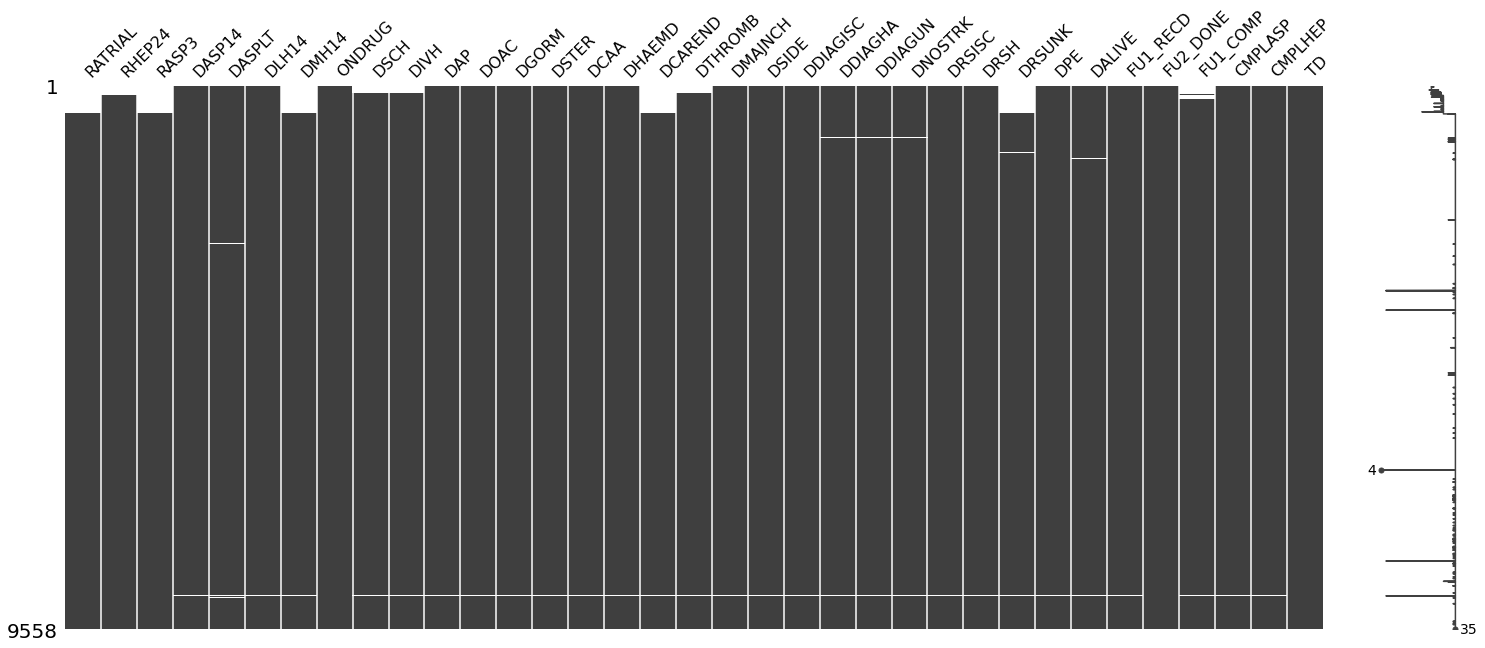

In [89]:
# see if values are Missing completely at random
missingdata_data1 = data1.columns[data1.isnull().any()].tolist()
msno.matrix(data1[missingdata_data1])

This matrix shows how nulls are scattered across the dataset. White segments or lines represent where missing values lie.

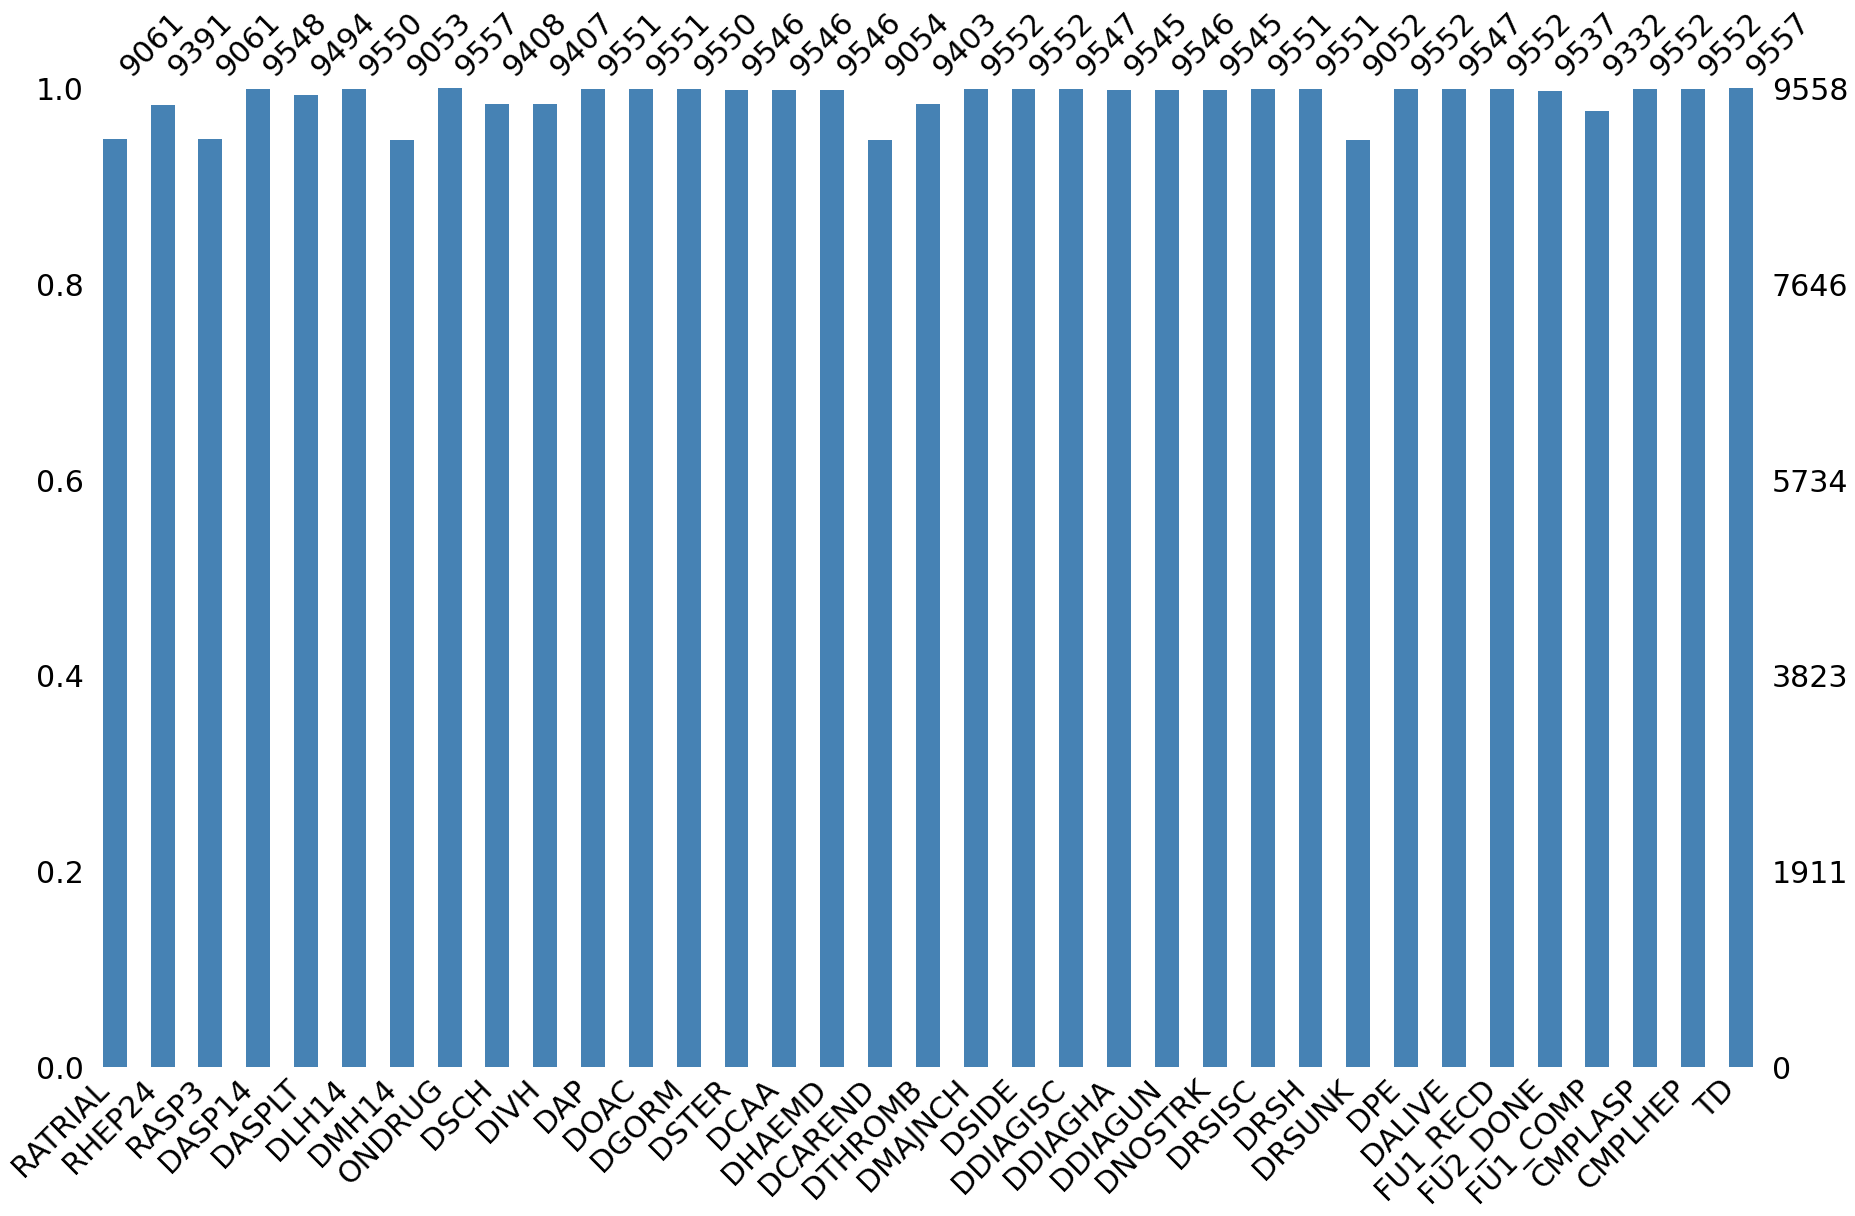

In [90]:
msno.bar(data1[missingdata_data1], color="steelblue", figsize=(30,18), fontsize=30)

In [91]:
num = [col for col in data1.columns if data1[col].dtype != 'object']
obj = [col for col in data1.columns if data1[col].dtype == 'object']

In [92]:
# Use fillna to impute null values with median in numeric columns 
data1.fillna(data1[num].median(), inplace = True)

In [93]:
# Use fillna to impute null values with mode in categorical columns 
l = data1[obj].mode()
data1[obj] = data1[obj].fillna(value=l.iloc[0])

In [94]:
data1.isna().sum()

ID           0
HOSPNUM      0
RDELAY       0
RCONSC       0
SEX          0
AGE          0
RSLEEP       0
RATRIAL      0
RCT          0
RVISINF      0
RHEP24       0
RASP3        0
RSBP         0
RDEF1        0
RDEF2        0
RDEF3        0
RDEF4        0
RDEF5        0
RDEF6        0
RDEF7        0
RDEF8        0
STYPE        0
RDATE        0
HOURLOCAL    0
MINLOCAL     0
DAYLOCAL     0
RXASP        0
RXHEP        0
DASP14       0
DASPLT       0
DLH14        0
DMH14        0
ONDRUG       0
DSCH         0
DIVH         0
DAP          0
DOAC         0
DGORM        0
DSTER        0
DCAA         0
DHAEMD       0
DCAREND      0
DTHROMB      0
DMAJNCH      0
DMAJNCHX     0
DSIDE        0
DSIDEX       0
DDIAGISC     0
DDIAGHA      0
DDIAGUN      0
DNOSTRK      0
DNOSTRKX     0
DRSISC       0
DRSH         0
DRSUNK       0
DPE          0
DALIVE       0
FU1_RECD     0
FU2_DONE     0
COUNTRY      0
CNTRYNUM     0
FU1_COMP     0
CMPLASP      0
CMPLHEP      0
TD           0
EXPDD        0
EXPD6     

In [95]:
# All features 
data_num1 = list(data1.select_dtypes(include = np.number).columns)
data_obj1 = list(data1.select_dtypes(include = np.object).columns) 

In [96]:
dum = pd.get_dummies(data1[data_obj1], drop_first=True)

In [97]:
data_mod1 = pd.concat([data1[data_num1], dum], axis = 1)

In [98]:
data_mod1.shape

(9558, 161)

In [99]:
data_mod1.head()

,ID,HOSPNUM,RDELAY,AGE,RSBP,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,ONDRUG,DMAJNCHX,DSIDEX,DNOSTRKX,FU1_RECD,FU2_DONE,CNTRYNUM,FU1_COMP,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14,RCONSC_F,RCONSC_U,SEX_M,RSLEEP_Y,RATRIAL_Y,RCT_Y,RVISINF_Y,RHEP24_Y,RASP3_Y,RDEF1_N,RDEF1_Y,RDEF2_N,RDEF2_Y,RDEF3_N,RDEF3_Y,RDEF4_N,RDEF4_Y,RDEF5_N,RDEF5_Y,RDEF6_N,RDEF6_Y,RDEF7_N,RDEF7_Y,RDEF8_N,RDEF8_Y,STYPE_OTH,STYPE_PACS,STYPE_POCS,STYPE_TACS,RXASP_Y,RXHEP_L,RXHEP_M,RXHEP_N,DASP14_U,DASP14_Y,...,DAP_Y,DOAC_U,DOAC_Y,DGORM_U,DGORM_Y,DSTER_U,DSTER_Y,DCAA_U,DCAA_Y,DHAEMD_U,DHAEMD_Y,DCAREND_U,DCAREND_Y,DTHROMB_U,DTHROMB_Y,DMAJNCH_U,DMAJNCH_Y,DSIDE_U,DSIDE_Y,DDIAGISC_U,DDIAGISC_Y,DDIAGISC_u,DDIAGHA_U,DDIAGHA_Y,DDIAGUN_U,DDIAGUN_Y,DNOSTRK_U,DNOSTRK_Y,DRSISC_U,DRSISC_Y,DRSH_U,DRSH_Y,DRSUNK_U,DRSUNK_Y,DPE_U,DPE_Y,DALIVE_U,DALIVE_Y,COUNTRY_AUSL,COUNTRY_AUST,COUNTRY_BELG,COUNTRY_BRAS,COUNTRY_CANA,COUNTRY_CHIL,COUNTRY_CZEC,COUNTRY_DENM,COUNTRY_EIRE,COUNTRY_FINL,COUNTRY_FRAN,COUNTRY_GREE,COUNTRY_HONG,COUNTRY_HUNG,COUNTRY_INDI,COUNTRY_ISRA,COUNTRY_ITAL,COUNTRY_JAPA,COUNTRY_NETH,COUNTRY_NEW,COUNTRY_NORW,COUNTRY_POLA,COUNTRY_PORT,COUNTRY_ROMA,COUNTRY_SING,COUNTRY_SLOK,COUNTRY_SLOV,COUNTRY_SOUT,COUNTRY_SPAI,COUNTRY_SRI,COUNTRY_SWED,COUNTRY_SWIT,COUNTRY_TURK,COUNTRY_UK,COUNTRY_USA,CMPLASP_Y,CMPLHEP_Y
0,9826,1,43,71,170,1,99,99,3,11.0,0,0,0,11.0,189.0,27,16.0,189.0,0.5275,0.1009,0.0323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,9827,1,6,81,170,1,99,99,7,14.0,0,0,0,23.0,183.0,27,16.0,183.0,0.4021,0.1147,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,9828,4,20,78,170,1,99,99,6,14.0,0,0,0,17.0,214.0,27,16.0,214.0,0.5600,0.1709,0.0441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,9829,1,39,54,135,1,99,99,2,7.0,0,0,0,16.0,185.0,27,16.0,185.0,0.3132,0.0471,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
4,9830,1,4,77,140,1,99,99,1,14.0,0,1,0,15.0,194.0,27,15.0,194.0,0.7285,0.1873,0.0530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [100]:
x_unseen = data_mod1

In [101]:
x_unseen_list = list(x_unseen)
x_unseen_list

['ID',
 'HOSPNUM',
 'RDELAY',
 'AGE',
 'RSBP',
 'RDATE',
 'HOURLOCAL',
 'MINLOCAL',
 'DAYLOCAL',
 'ONDRUG',
 'DMAJNCHX',
 'DSIDEX',
 'DNOSTRKX',
 'FU1_RECD',
 'FU2_DONE',
 'CNTRYNUM',
 'FU1_COMP',
 'TD',
 'EXPDD',
 'EXPD6',
 'EXPD14',
 'SET14D',
 'ID14',
 'DEAD1',
 'DEAD2',
 'DEAD3',
 'DEAD4',
 'DEAD5',
 'DEAD6',
 'DEAD7',
 'DEAD8',
 'H14',
 'ISC14',
 'NK14',
 'STRK14',
 'HTI14',
 'PE14',
 'DVT14',
 'TRAN14',
 'NCB14',
 'RCONSC_F',
 'RCONSC_U',
 'SEX_M',
 'RSLEEP_Y',
 'RATRIAL_Y',
 'RCT_Y',
 'RVISINF_Y',
 'RHEP24_Y',
 'RASP3_Y',
 'RDEF1_N',
 'RDEF1_Y',
 'RDEF2_N',
 'RDEF2_Y',
 'RDEF3_N',
 'RDEF3_Y',
 'RDEF4_N',
 'RDEF4_Y',
 'RDEF5_N',
 'RDEF5_Y',
 'RDEF6_N',
 'RDEF6_Y',
 'RDEF7_N',
 'RDEF7_Y',
 'RDEF8_N',
 'RDEF8_Y',
 'STYPE_OTH',
 'STYPE_PACS',
 'STYPE_POCS',
 'STYPE_TACS',
 'RXASP_Y',
 'RXHEP_L',
 'RXHEP_M',
 'RXHEP_N',
 'DASP14_U',
 'DASP14_Y',
 'DASPLT_U',
 'DASPLT_Y',
 'DLH14_U',
 'DLH14_Y',
 'DMH14_U',
 'DMH14_Y',
 'DSCH_U',
 'DSCH_Y',
 'DIVH_U',
 'DIVH_Y',
 'DAP_U',
 'DAP_Y',
 '

In [102]:
x = x[x_unseen_list]

In [103]:
classifier_XGB.fit(x,y)
y_unseen = classifier_XGB.predict(x_unseen)
y_unseen = pd.DataFrame(y_unseen, columns = ['PatientDied'])
y_unseen.replace({0: 'N', 1: 'Y'}, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
y_unseen.shape

(9558, 1)

In [105]:
ID = data_mod1.loc[:,['ID']]
ID['ID'] = ID['ID'].astype('object')

ID.shape

(9558, 1)

In [106]:
df = pd.concat([ID, y_unseen], axis = 1)
df = df[['ID','PatientDied']]
df.head(20)

,ID,PatientDied
0,9826,N
1,9827,N
2,9828,N
3,9829,N
4,9830,N
5,9831,N
6,9832,N
7,9833,N
8,9834,N
9,9835,N


In [107]:
df.to_csv("Result2.csv", index = False)